In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iot-agriculture-2024/IoTProcessed_Data.csv
/kaggle/input/electric-vehicle-population-size-2024/Electric_Vehicle_Population_Size_History_By_County_.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd. read_csv("/kaggle/input/iot-agriculture-2024/IoTProcessed_Data.csv")

In [4]:
df

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37917,2024-02-02 22:20:00,3,59,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37918,2024-02-02 22:25:00,3,60,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37919,2024-02-02 22:30:00,3,60,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37920,2024-02-02 22:35:00,3,59,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0


*** Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     37920 non-null  object 
 1   tempreature              37922 non-null  int64  
 2   humidity                 37922 non-null  int64  
 3   water_level              37922 non-null  int64  
 4   N                        37922 non-null  int64  
 5   P                        37922 non-null  int64  
 6   K                        37922 non-null  int64  
 7   Fan_actuator_OFF         37922 non-null  float64
 8   Fan_actuator_ON          37922 non-null  float64
 9   Watering_plant_pump_OFF  37922 non-null  float64
 10  Watering_plant_pump_ON   37922 non-null  float64
 11  Water_pump_actuator_OFF  37922 non-null  float64
 12  Water_pump_actuator_ON   37922 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.8+ MB


In [6]:
df.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

###  Data preprocessing

In [8]:
df.isnull().sum()

date                       2
tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
dtype: int64

- >we have null values in the Data column, But Date column will be dropped.

In [9]:
df.duplicated().sum()

0

- > There are no DUIplicate values present in the dataset

Droping the Non-required column in the dataset

In [10]:
df.drop(["Watering_plant_pump_OFF","Water_pump_actuator_OFF","Fan_actuator_OFF"],axis=1,inplace=True)

In [11]:
df.drop(["date"],axis=1,inplace=True)

In [12]:
df["Fan_actuator"]=df["Fan_actuator_ON"]
df["Watering_plant_pump"]=df["Watering_plant_pump_ON"]
df["Water_pump_actuator"]=df["Water_pump_actuator_ON"]

Dropping the IoT columns with ON positon as its title

In [13]:
df.drop(["Fan_actuator_ON","Watering_plant_pump_ON","Water_pump_actuator_ON"],axis=1,inplace=True)

In [14]:
df

,tempreature,humidity,water_level,N,P,K,Fan_actuator,Watering_plant_pump,Water_pump_actuator
0,41,63,100,255,255,255,1.0,0.0,0.0
1,41,59,100,255,255,255,1.0,0.0,0.0
2,41,62,100,255,255,255,1.0,0.0,0.0
3,40,60,100,255,255,255,1.0,0.0,0.0
4,39,61,100,255,255,255,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
37917,3,59,100,255,255,255,0.0,0.0,0.0
37918,3,60,100,255,255,255,0.0,0.0,0.0
37919,3,60,100,255,255,255,0.0,0.0,0.0
37920,3,59,100,255,255,255,0.0,0.0,0.0


### Outliers Handling

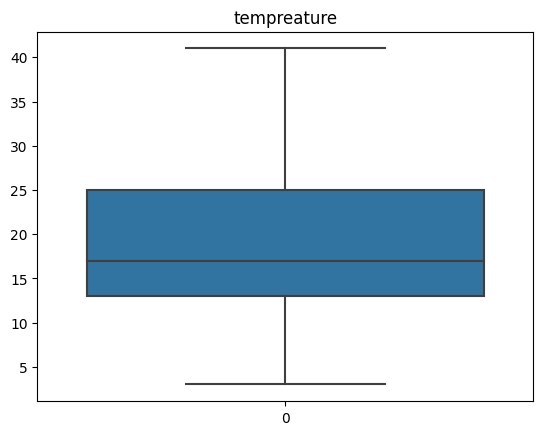

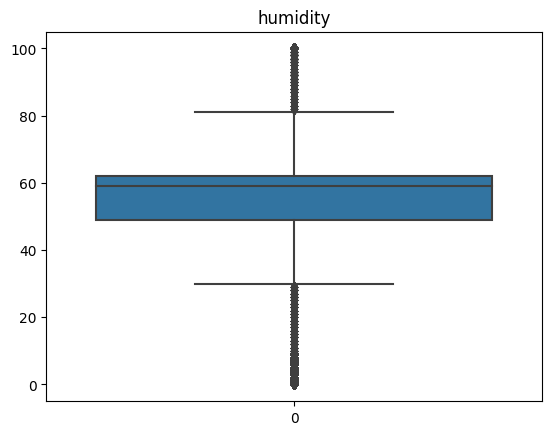

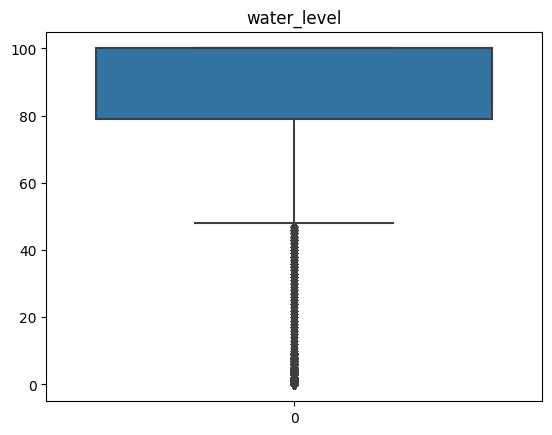

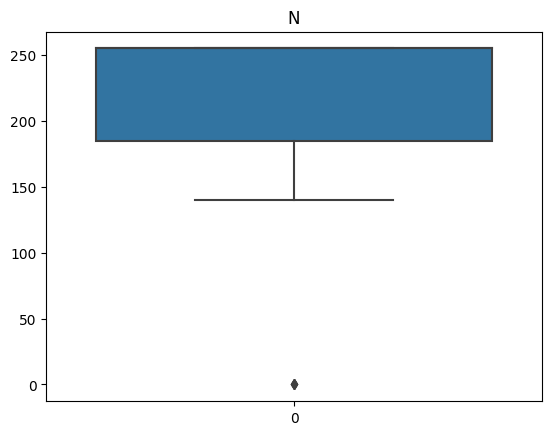

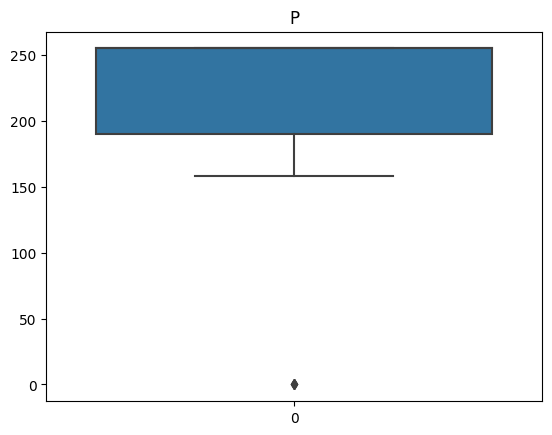

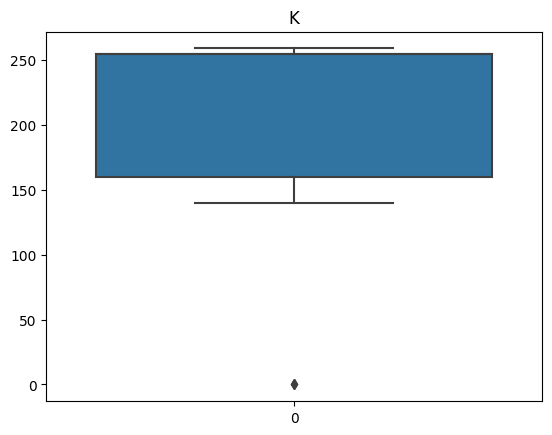

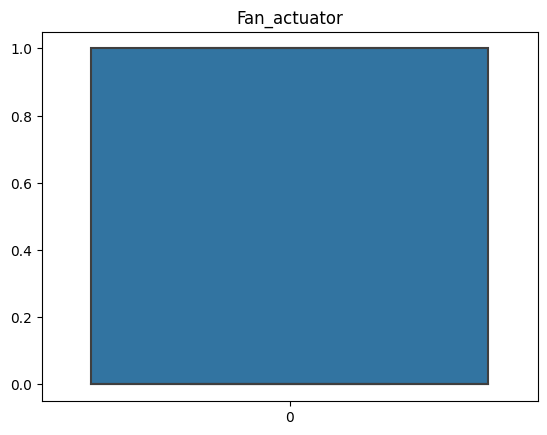

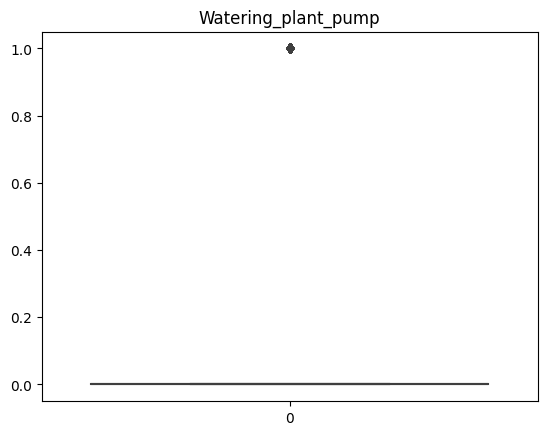

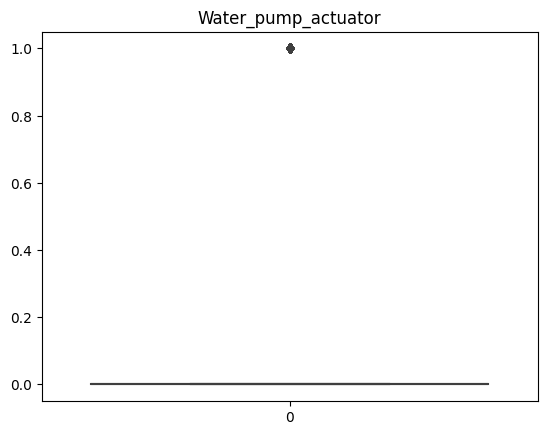

In [15]:
for column in df.columns:
    if type(df[column][0])!=str:
        sns.boxplot(df[column])
        plt.title(column)
        plt.show()

- > there are Outliers present in the Multiple columns like Humidity and water level 

we shouls not consider the outliers for the N,K and P since Those values are almost related to Zero and maximum values few records are other than these values.

In [16]:
Q1=df["humidity"].quantile(0.25)
Q3=df["humidity"].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)

In [17]:
print("lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower_limit 29.5
Upper_limit 81.5


In [18]:
! pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 72.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [19]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail="both", fold=1.5)
win.fit_transform(df[["humidity"]])

,humidity
0,63.0
1,59.0
2,62.0
3,60.0
4,61.0
...,...
37917,59.0
37918,60.0
37919,60.0
37920,59.0


### Exploratory Data Analysis

#### Descriptive_Analysis

### - > Univariate 

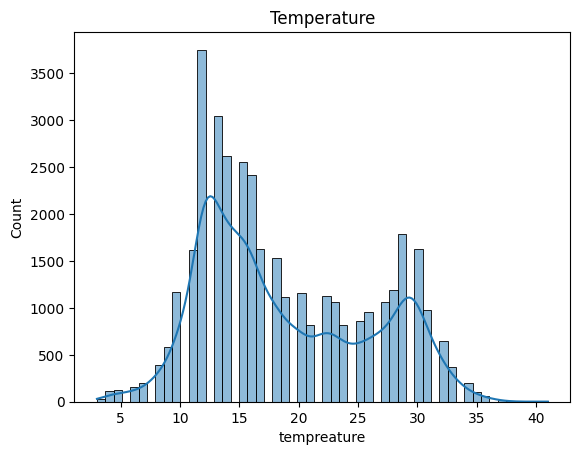

In [20]:
sns.histplot(x=df["tempreature"],kde=True)
plt.title("Temperature")
plt.show()

- > Temerature Ranges from 5 to 35 degrees.

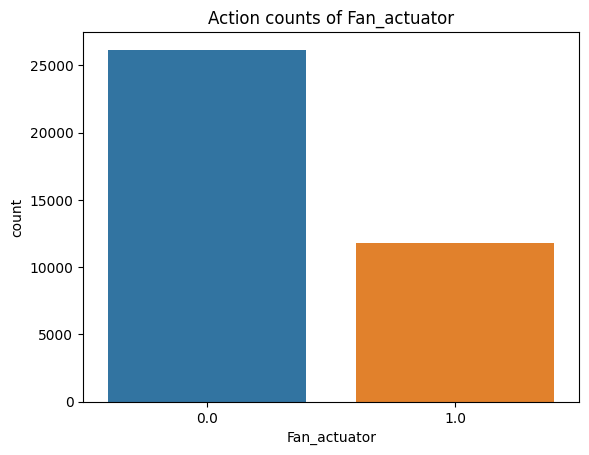

In [21]:
sns.countplot(x=df["Fan_actuator"])
plt.title("Action counts of Fan_actuator")
plt.show()

In [22]:
df["Fan_actuator"].value_counts()

Fan_actuator
0.0    26161
1.0    11761
Name: count, dtype: int64

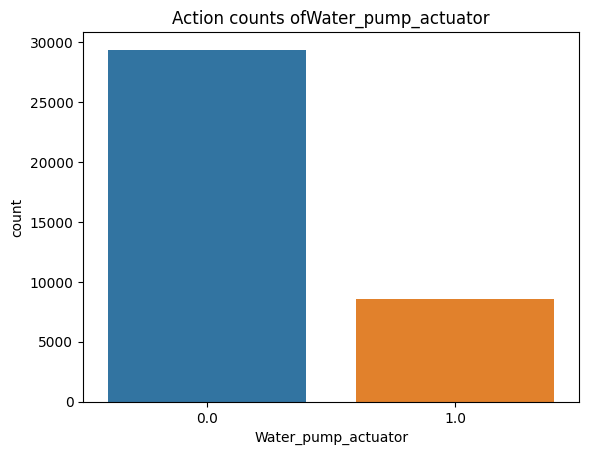

In [23]:
sns.countplot(x=df["Water_pump_actuator"])
plt.title("Action counts ofWater_pump_actuator")
plt.show()

In [24]:
df["Water_pump_actuator"].value_counts()

Water_pump_actuator
0.0    29357
1.0     8565
Name: count, dtype: int64

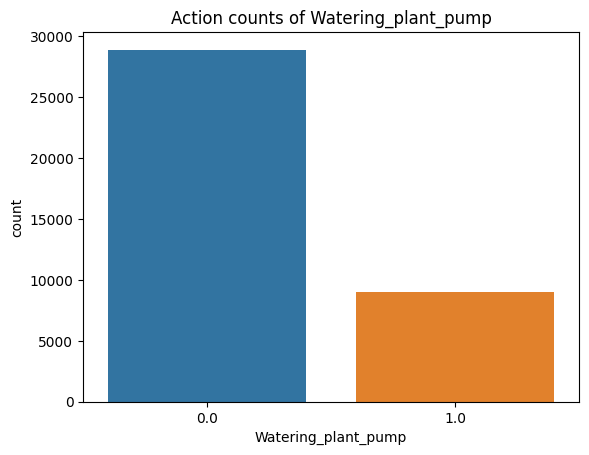

In [25]:
sns.countplot(x=df["Watering_plant_pump"])
plt.title("Action counts of Watering_plant_pump")
plt.show()

In [26]:
df["Watering_plant_pump"].value_counts()


Watering_plant_pump
0.0    28900
1.0     9022
Name: count, dtype: int64

#### - > Bivariate Analysis

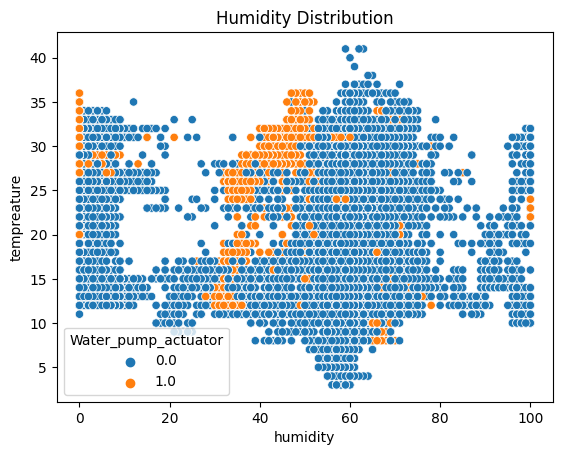

In [27]:
sns.scatterplot(x=df["humidity"],y=df["tempreature"],hue=df["Water_pump_actuator"])
plt.title("Humidity Distribution")
plt.show()

- > water pump actuator on when the temperature between 12 to 40 degrees temperature and hunidity with 35 to 50 

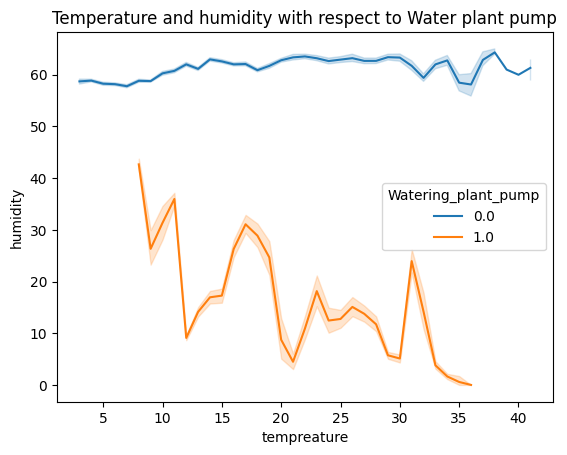

In [28]:
sns.lineplot(data=df, x="tempreature",y="humidity", hue=df["Watering_plant_pump"])
plt.title("Temperature and humidity with respect to Water plant pump")
plt.show()

- > Humidity constantly decreasing by Increasing in temperature when water Plannt pump in ON position
- > Humidity renains constant when Temperature increasses or deccreases.


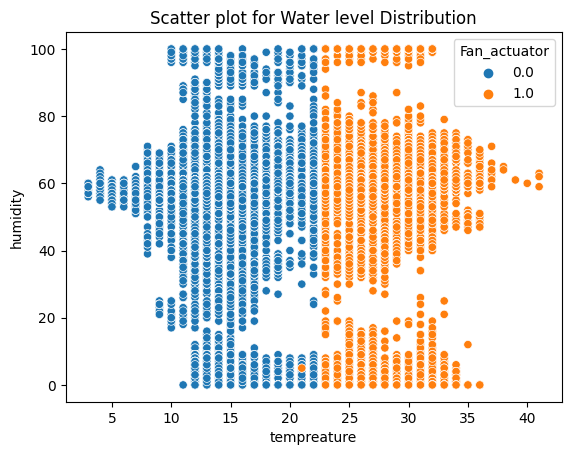

In [29]:
sns.scatterplot(x=df["tempreature"],y=df["humidity"],hue=df["Fan_actuator"])
plt.title("Scatter plot for Water level Distribution")
plt.show()

- >  Fan Actuator is being ON when the Temperaature exceeds 23 degrees  

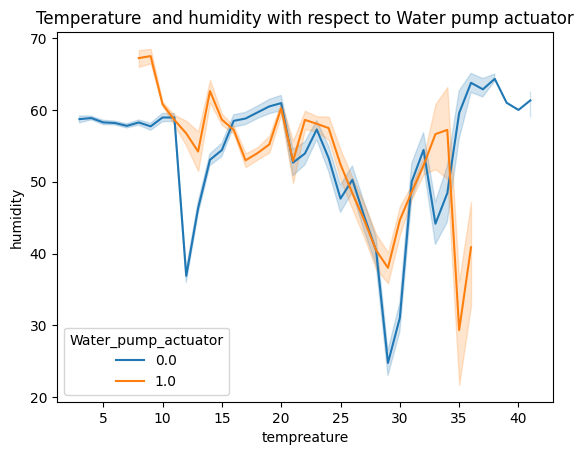

In [30]:
sns.lineplot(data=df, x="tempreature",y="humidity", hue=df["Water_pump_actuator"])
plt.title("Temperature  and humidity with respect to Water pump actuator")
plt.show()

- > small Change is observed  in humidity along the change in temperature when the water pump actuator is in off position.
- >  Gradual drop of humidity witht the change in temperature  when the water pump actuator is in on position.

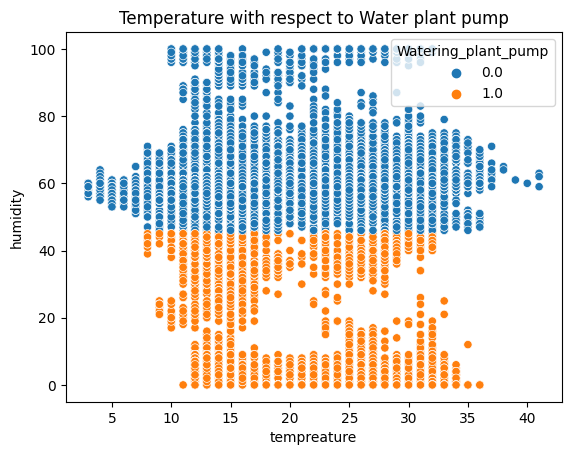

In [31]:
sns.scatterplot(data=df, x="tempreature",y="humidity", hue=df["Watering_plant_pump"])
plt.title("Temperature with respect to Water plant pump")
plt.show()

- > Water plant pump is in ON position when the humidity is below 50 and temperature in 15 to 35 degrees in temperature.

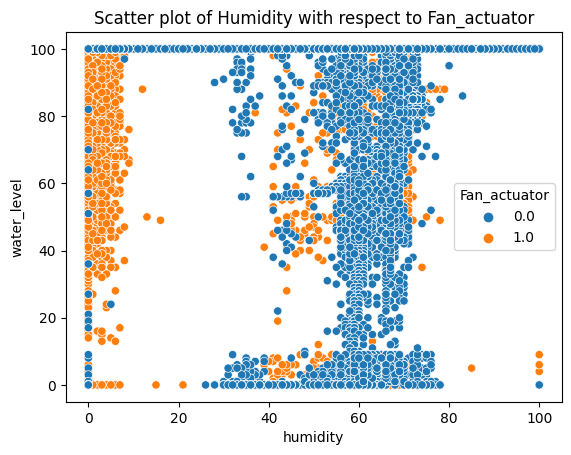

In [32]:
sns.scatterplot(data=df, x="humidity",y="water_level",hue="Fan_actuator")
plt.title("Scatter plot of Humidity with respect to Fan_actuator")
plt.show()

- > Fan actuator is In ON position when the Humidity is lessthan 15

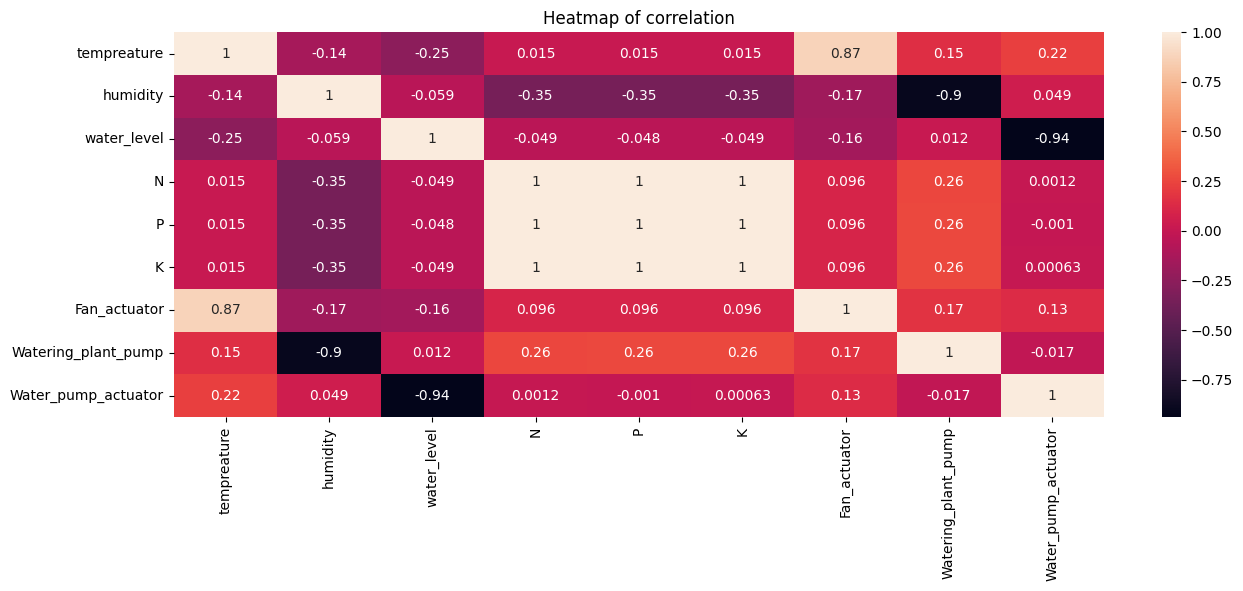

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of correlation")
plt.show()

In [34]:
df.corr()

,tempreature,humidity,water_level,N,P,K,Fan_actuator,Watering_plant_pump,Water_pump_actuator
tempreature,1.000000,-0.138722,-0.251429,0.015274,0.014683,0.014553,0.873971,0.145565,0.221589
humidity,-0.138722,1.000000,-0.058851,-0.350314,-0.350360,-0.351186,-0.173762,-0.902909,0.049270
water_level,-0.251429,-0.058851,1.000000,-0.048689,-0.047746,-0.048712,-0.156992,0.012289,-0.939148
N,0.015274,-0.350314,-0.048689,1.000000,0.999681,0.999006,0.096196,0.257082,0.001157
P,0.014683,-0.350360,-0.047746,0.999681,1.000000,0.999309,0.095800,0.258103,-0.001019
K,0.014553,-0.351186,-0.048712,0.999006,0.999309,1.000000,0.095971,0.259073,0.000629
Fan_actuator,0.873971,-0.173762,-0.156992,0.096196,0.095800,0.095971,1.000000,0.172842,0.129343
Watering_plant_pump,0.145565,-0.902909,0.012289,0.257082,0.258103,0.259073,0.172842,1.000000,-0.017135
Water_pump_actuator,0.221589,0.049270,-0.939148,0.001157,-0.001019,0.000629,0.129343,-0.017135,1.000000


In [35]:
df.columns

Index(['tempreature', 'humidity', 'water_level', 'N', 'P', 'K', 'Fan_actuator',
       'Watering_plant_pump', 'Water_pump_actuator'],
      dtype='object')

In [36]:
df["Water_pump_actuator"].value_counts()

Water_pump_actuator
0.0    29357
1.0     8565
Name: count, dtype: int64

#### Categorical Handling

In [37]:
df["Fan_actuator"]=df["Fan_actuator"].astype("int")
df["Watering_plant_pump"]=df["Watering_plant_pump"].astype("int")
df["Water_pump_actuator"]=df["Water_pump_actuator"].astype("int")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   tempreature          37922 non-null  int64
 1   humidity             37922 non-null  int64
 2   water_level          37922 non-null  int64
 3   N                    37922 non-null  int64
 4   P                    37922 non-null  int64
 5   K                    37922 non-null  int64
 6   Fan_actuator         37922 non-null  int64
 7   Watering_plant_pump  37922 non-null  int64
 8   Water_pump_actuator  37922 non-null  int64
dtypes: int64(9)
memory usage: 2.6 MB


#### Balancing  Data with SMOTE 

In [40]:
X = df.drop(["Fan_actuator", "Watering_plant_pump", "Water_pump_actuator"], axis=1)
Y = df[["Fan_actuator", "Watering_plant_pump", "Water_pump_actuator"]]

In [43]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# x_sample, y_sample = smote.fit_resample(x, y)

x_sample, y_sample = X.copy(), Y.copy()

### Train Test Split 

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=0)

In [45]:
x_train

,tempreature,humidity,water_level,N,P,K
366,34,63,100,255,255,255
33474,12,59,100,255,255,255
15918,19,59,100,255,255,255
3199,30,5,100,255,255,255
8439,26,63,100,255,255,255
...,...,...,...,...,...,...
20757,16,60,0,255,255,255
32103,12,9,100,255,255,255
30403,12,63,100,178,186,157
21243,16,59,100,255,255,255


In [46]:
x_test

,tempreature,humidity,water_level,N,P,K
5721,29,61,100,255,255,255
4149,29,97,100,178,186,157
11088,23,65,100,178,186,157
12841,22,60,100,255,255,255
23876,15,60,100,255,255,255
...,...,...,...,...,...,...
14448,20,54,0,255,255,255
17000,18,36,0,255,255,255
27391,13,0,100,178,186,157
21076,16,66,100,255,255,255


In [47]:
y_train

,Fan_actuator,Watering_plant_pump,Water_pump_actuator
366,1,0,0
33474,0,0,0
15918,0,0,0
3199,1,1,0
8439,1,0,0
...,...,...,...
20757,0,0,1
32103,0,1,0
30403,0,0,0
21243,0,0,0


In [48]:
y_test

,Fan_actuator,Watering_plant_pump,Water_pump_actuator
5721,1,0,0
4149,1,0,0
11088,1,0,0
12841,0,0,0
23876,0,0,0
...,...,...,...
14448,0,0,1
17000,0,1,1
27391,0,1,0
21076,0,0,0


## Model Building 

### Logistic  Model

In [51]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression(solver='liblinear', random_state=42)
model1 = MultiOutputClassifier(base_model)
model1.fit(x_sample, y_sample)

,estimator,LogisticRegre...r='liblinear')
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'


In [52]:
#predictions
y_pred_sample=model1.predict(x_sample)
y_pred_test=model1.predict(x_test)

In [53]:
#evolution
from sklearn.metrics import accuracy_score
sample_acc_1=accuracy_score(y_pred_sample,y_sample)
test_acc_1=accuracy_score(y_pred_test,y_test)


In [54]:
from sklearn.model_selection import cross_val_score
print("Sample_accuracy",sample_acc_1)
print("test_accuracy",test_acc_1)
print("cross_val_score",cross_val_score(model1,x_sample,y_sample,cv=5).mean())

Sample_accuracy 0.9918516955856759
test_accuracy 0.992748846407383
cross_val_score 0.9713637460399578


#### Testing metrics 

In [59]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
print("\n--- Multi-Target Metrics (average='samples') ---")
precision_samples = precision_score(y_sample, y_pred_sample, average='samples')
recall_samples = recall_score(y_sample, y_pred_sample, average='samples')
f1_samples = f1_score(y_sample, y_pred_sample, average='samples')

print("precision_samples:", precision_samples)
print("recall_samples:", recall_samples)
print("f1_samples:", f1_samples)

print("\n--- Multi-Target Metrics (average='macro') ---")
precision_macro = precision_score(y_sample, y_pred_sample, average='macro', zero_division=0)
recall_macro = recall_score(y_sample, y_pred_sample, average='macro', zero_division=0)
f1_macro = f1_score(y_sample, y_pred_sample, average='macro', zero_division=0)

print("precision_macro:", precision_macro)
print("recall_macro:", recall_macro)
print("f1_macro:", f1_macro)

print("\n--- Multi-Target Metrics (average='weighted') ---")
precision_weighted = precision_score(y_sample, y_pred_sample, average='weighted', zero_division=0)
recall_weighted = recall_score(y_sample, y_pred_sample, average='weighted', zero_division=0)
f1_weighted = f1_score(y_sample, y_pred_sample, average='weighted', zero_division=0)

print("precision_weighted:", precision_weighted)
print("recall_weighted:", recall_weighted)
print("f1_weighted:", f1_weighted)


--- Multi-Target Metrics (average='samples') ---
precision_samples: 0.5499358332014836
recall_samples: 0.549505124553909
f1_samples: 0.5495982982613435

--- Multi-Target Metrics (average='macro') ---
precision_macro: 0.9950999550821225
recall_macro: 0.9928602253823596
f1_macro: 0.9939757597671403

--- Multi-Target Metrics (average='weighted') ---
precision_weighted: 0.9956769206415863
recall_weighted: 0.9937304075235109
f1_weighted: 0.9946998720114785


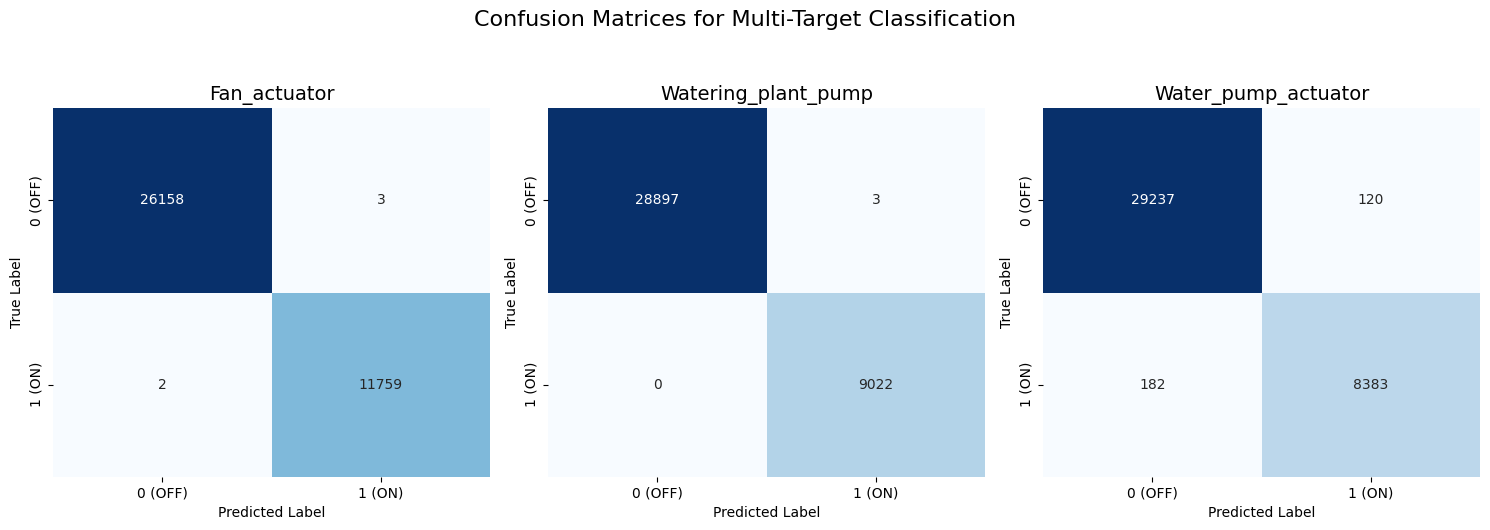

In [77]:
# print("confusion_matrix",confusion_matrix(y_pred_sample,y_sample))
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['Fan_actuator', 'Watering_plant_pump', 'Water_pump_actuator']

# Set up the figure for 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrices for Multi-Target Classification', fontsize=16, y=1.05)

labels = ['0 (OFF)', '1 (ON)']

# Iterate over each target column (actuator)
for i, target in enumerate(target_names):
    # Extract the true and predicted labels for the current target
    # NOTE: This indexing handles both Pandas DataFrame and NumPy array results
    y_true_single = y_sample.iloc[:, i] if isinstance(y_sample, pd.DataFrame) else y_sample[:, i]
    y_pred_single = y_pred_sample[:, i]

    # Calculate the confusion matrix for the single target
    cm = confusion_matrix(y_true_single, y_pred_single)

    # Plot the heatmap
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, ax=ax)
    
    # Add titles and labels
    ax.set_title(target, fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('multi_target_confusion_matrices.png')
plt.show() 

- > from the above confusion matrix 471 records are wrongly classified as false but it is actually True
- > 414 records are classified wrong as they are actually false defined as true

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='gini',max_depth= 4,splitter= 'best')
model2.fit(x_sample,y_sample)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [82]:
#predictions
y_pred_sample_2=model2.predict(x_sample)
y_pred_test_2=model2.predict(x_test)

sample_acc_2=accuracy_score(y_sample,y_pred_sample_2)
test_acc_2=accuracy_score(y_test,y_pred_test_2)
print("sample_accuracy", sample_acc_2)
print("test accuraccy",test_acc_2)
print("cross_val_score",cross_val_score(model2,x_sample,y_sample,cv=5).mean())

sample_accuracy 0.9941722482991403
test accuraccy 0.9949901120632828
cross_val_score 0.9650091160935557


In [83]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
print("\n--- Multi-Target Metrics (average='samples') ---")
precision_samples = precision_score(y_sample, y_pred_sample_2, average='samples')
recall_samples = recall_score(y_sample, y_pred_sample_2, average='samples')
f1_samples = f1_score(y_sample, y_pred_sample_2, average='samples')

print("precision_samples:", precision_samples)
print("recall_samples:", recall_samples)
print("f1_samples:", f1_samples)

print("\n--- Multi-Target Metrics (average='macro') ---")
precision_macro = precision_score(y_sample, y_pred_sample_2, average='macro', zero_division=0)
recall_macro = recall_score(y_sample, y_pred_sample_2, average='macro', zero_division=0)
f1_macro = f1_score(y_sample, y_pred_sample_2, average='macro', zero_division=0)

print("precision_macro:", precision_macro)
print("recall_macro:", recall_macro)
print("f1_macro:", f1_macro)

print("\n--- Multi-Target Metrics (average='weighted') ---")
precision_weighted = precision_score(y_sample, y_pred_sample_2, average='weighted', zero_division=0)
recall_weighted = recall_score(y_sample, y_pred_sample_2, average='weighted', zero_division=0)
f1_weighted = f1_score(y_sample, y_pred_sample_2, average='weighted', zero_division=0)

print("precision_weighted:", precision_weighted)
print("recall_weighted:", recall_weighted)
print("f1_weighted:", f1_weighted)


--- Multi-Target Metrics (average='samples') ---
precision_samples: 0.5492502153543237
recall_samples: 0.5494567797057117
f1_samples: 0.5493064711776805

--- Multi-Target Metrics (average='macro') ---
precision_macro: 0.997456254117011
recall_macro: 0.9939393557345735
f1_macro: 0.9956882090737551

--- Multi-Target Metrics (average='weighted') ---
precision_weighted: 0.9977618936756717
recall_weighted: 0.9946844759438462
f1_weighted: 0.996214783323406


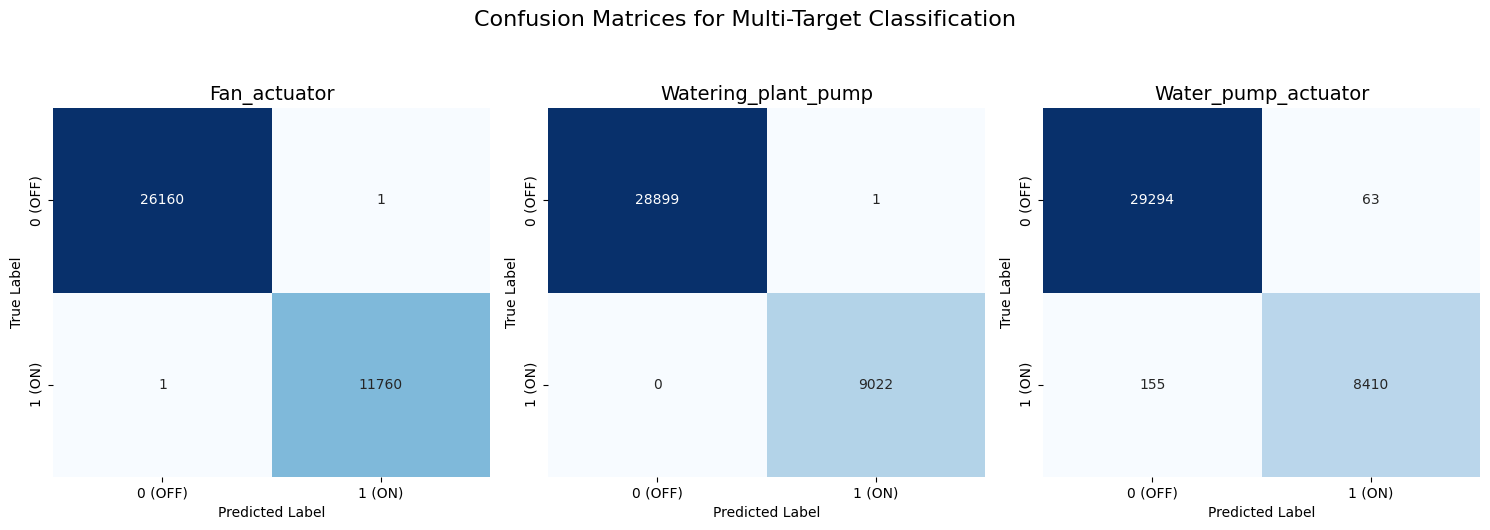

In [92]:
# print("confusion_matrix",confusion_matrix(y_pred_sample_2,y_sample))
# print("confusion_matrix",confusion_matrix(y_pred_sample,y_sample))
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['Fan_actuator', 'Watering_plant_pump', 'Water_pump_actuator']

# Set up the figure for 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrices for Multi-Target Classification', fontsize=16, y=1.05)

labels = ['0 (OFF)', '1 (ON)']

# Iterate over each target column (actuator)
for i, target in enumerate(target_names):
    # Extract the true and predicted labels for the current target
    # NOTE: This indexing handles both Pandas DataFrame and NumPy array results
    y_true_single = y_sample.iloc[:, i] if isinstance(y_sample, pd.DataFrame) else y_sample[:, i]
    y_pred_single = y_pred_sample_2[:, i]

    # Calculate the confusion matrix for the single target
    cm = confusion_matrix(y_true_single, y_pred_single)

    # Plot the heatmap
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, ax=ax)
    
    # Add titles and labels
    ax.set_title(target, fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('multi_target_confusion_matrices_2.png')
plt.show() 

- > from the above confusion matrix 404 records are wrongly classified as false but it is actually True
- > 114 records are classified wrong as they are actually false defined as true

In [80]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,6)),"splitter":["best","random"]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_sample,y_sample)
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

### Random Forest


In [85]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_sample,y_sample)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
# predicrtions 
y_pred_sample_3=model3.predict(x_sample)
y_pred_test_3=model3.predict(x_test)


In [87]:
from sklearn. metrics import accuracy_score 
sample_accuracy=accuracy_score(y_pred_sample_3,y_sample)
test_accuracy=accuracy_score(y_pred_test_3,y_test)
print("sample_accuracy",sample_accuracy)
print("test_accuracy",test_accuracy)

sample_accuracy 0.9975739676177416
test_accuracy 0.9982860909690178


In [88]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model3,x_sample,y_sample,cv=5,scoring="accuracy" ).mean())

0.9648509056293093


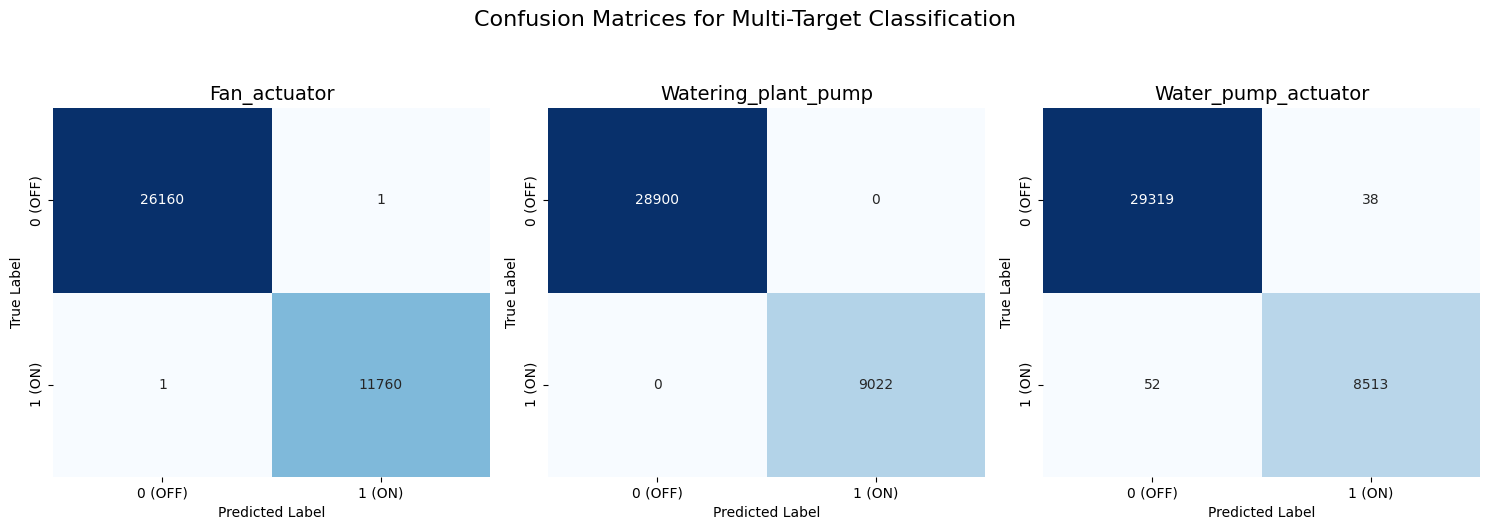

In [91]:
# print("confusion_matrix",confusion_matrix(y_pred_sample_2,y_sample))
# print("confusion_matrix",confusion_matrix(y_pred_sample,y_sample))
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['Fan_actuator', 'Watering_plant_pump', 'Water_pump_actuator']

# Set up the figure for 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrices for Multi-Target Classification', fontsize=16, y=1.05)

labels = ['0 (OFF)', '1 (ON)']

# Iterate over each target column (actuator)
for i, target in enumerate(target_names):
    # Extract the true and predicted labels for the current target
    # NOTE: This indexing handles both Pandas DataFrame and NumPy array results
    y_true_single = y_sample.iloc[:, i] if isinstance(y_sample, pd.DataFrame) else y_sample[:, i]
    y_pred_single = y_pred_sample_3[:, i]

    # Calculate the confusion matrix for the single target
    cm = confusion_matrix(y_true_single, y_pred_single)

    # Plot the heatmap
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, ax=ax)
    
    # Add titles and labels
    ax.set_title(target, fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('multi_target_confusion_matrices_3.png')
plt.show() 

- > we obtain the train accuracy, test accuracy and Cross validation score  up to the mark so we need to test with random data.

In [93]:
x_sample

,tempreature,humidity,water_level,N,P,K
0,41,63,100,255,255,255
1,41,59,100,255,255,255
2,41,62,100,255,255,255
3,40,60,100,255,255,255
4,39,61,100,255,255,255
...,...,...,...,...,...,...
37917,3,59,100,255,255,255
37918,3,60,100,255,255,255
37919,3,60,100,255,255,255
37920,3,59,100,255,255,255


### Model Testing

In [97]:
model3.predict([[41, 63, 100, 255, 255, 255]])

array([[1, 0, 0]])

In [96]:
import joblib 
joblib.dump(model3,open("DecisionTree.joblib","wb")) 

In [98]:
import pickle

# Use the pickle library
file_name = "DecisionTree.pkl" 

with open(file_name, 'wb') as file:
    pickle.dump(model3, file)

print(f"Model successfully saved to {file_name} using pickle.")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Model successfully saved to DecisionTree.pkl using pickle.


### This is the final model